> 신년을 맞이해서 1월에 폰을 구매한 고객에게 선물을 증정하는 이벤트를 준비하고 있다.
1월 예상매출의 2%를 마케팅 예산으로 책정하고, 2020년 1월  마케팅 예산을 예측해보자. <br>

> 가설 : 2019년 데이터를 기반으로 2020년 1월 폰 매출을 예측할 수 있다


In [ ]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

df_phone = pd.read_csv('/content/drive/MyDrive/Colab_AIB/Project/Section2 Project/df_phone.csv')
df_phone.head()

,Unnamed: 0,Order_ID,Product,Quantity,Price,Order_Date,Category,Gender,Age_Range,Discount,Date,Weeks,Month,Sales,Customer_city
0,58586,141732,iPhone,20,700.0,2019-01-01 06:13:00,Phone,1,20,0.01,2019-01-01,1,1,13860.0,Atlanta
1,61820,144804,iPhone,4,700.0,2019-01-01 07:29:00,Phone,1,20,0.19,2019-01-01,1,1,2268.0,New York City
2,62316,145270,Google Phone,25,600.0,2019-01-01 07:33:00,Phone,0,10,0.18,2019-01-01,1,1,12300.0,Dallas
3,59016,142134,Google Phone,3,600.0,2019-01-01 09:23:00,Phone,1,10,0.11,2019-01-01,1,1,1602.0,New York City
4,67156,149926,iPhone,10,700.0,2019-01-01 09:33:00,Phone,1,40,0.02,2019-01-01,1,1,6860.0,Atlanta


In [ ]:
# 기존 인덱스와 카테고리 특성은 삭제

df_phone.drop(columns=['Unnamed: 0','Category'], inplace=True)
df_phone.head().T

,0,1,2,3,4
Order_ID,141732,144804,145270,142134,149926
Product,iPhone,iPhone,Google Phone,Google Phone,iPhone
Quantity,20,4,25,3,10
Price,700.0,700.0,600.0,600.0,700.0
Order_Date,2019-01-01 06:13:00,2019-01-01 07:29:00,2019-01-01 07:33:00,2019-01-01 09:23:00,2019-01-01 09:33:00
Gender,1,1,0,1,1
Age_Range,20,20,10,10,40
Discount,0.01,0.19,0.18,0.11,0.02
Date,2019-01-01,2019-01-01,2019-01-01,2019-01-01,2019-01-01
Weeks,1,1,1,1,1


In [ ]:
days = df_phone['Date'].unique()
d_sales = df_phone.groupby('Date')['Sales'].sum()

df_d = d_sales.to_frame()
df_d['Date'] = df_d.index
df_d['Date'] = df_d['Date'].astype(str).str.replace('-','').astype(float)
df_d['Date_t'] = df_d.index
df_d.head()

,Sales,Date,Date_t
Date,,,
2019-01-01,142167.0,20190101.0,2019-01-01
2019-01-02,163029.0,20190102.0,2019-01-02
2019-01-03,104360.0,20190103.0,2019-01-03
2019-01-04,85766.0,20190104.0,2019-01-04
2019-01-05,74831.0,20190105.0,2019-01-05


In [ ]:
# 주간매출 합계 계산

weeks = df_phone['Weeks'].unique()
w_sales = df_phone.groupby('Weeks')['Sales'].sum()

df_w = w_sales.to_frame()
df_w['Weeks'] = df_w.index
df_w.head()

,Sales,Weeks
Weeks,,
1,704288.0,1
2,911606.0,2
3,764942.0,3
4,1057259.0,4
5,1103042.0,5


In [ ]:
# 월간매출 합계 계산

month = df_phone['Month'].unique()
m_sales = df_phone.groupby('Month')['Sales'].sum()

df_m = m_sales.to_frame()
df_m['Month'] = df_m.index
df_m.head()

,Sales,Month
Month,,
1,3972541.0,1
2,4526738.0,2
3,5733468.0,3
4,7101516.0,4
5,6222297.0,5


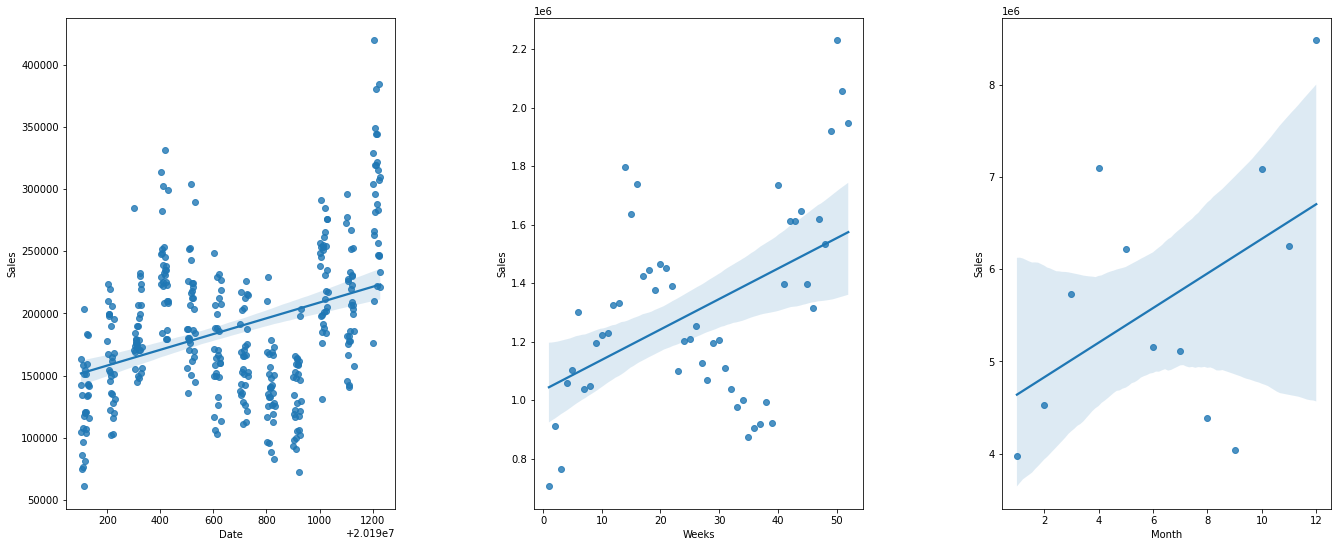

In [ ]:
# 일간, 주간, 월간 선형회귀 그래프 비교

figure, (ax1, ax2, ax3) = plt.subplots(ncols=3)
plt.tight_layout()
figure.set_size_inches(20,8)

sns.regplot(x = 'Date', y = 'Sales', data = df_d, ax=ax1)
sns.regplot(x = 'Weeks', y = 'Sales', data = df_w, ax=ax2)
sns.regplot(x = 'Month', y = 'Sales', data = df_m, ax=ax3);

In [ ]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14308 entries, 0 to 14307
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       14308 non-null  int64  
 1   Product        14308 non-null  object 
 2   Quantity       14308 non-null  int64  
 3   Price          14308 non-null  float64
 4   Order_Date     14308 non-null  object 
 5   Gender         14308 non-null  int64  
 6   Age_Range      14308 non-null  int64  
 7   Discount       14308 non-null  float64
 8   Date           14308 non-null  object 
 9   Weeks          14308 non-null  int64  
 10  Month          14308 non-null  int64  
 11  Sales          14308 non-null  float64
 12  Customer_city  14308 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 1.4+ MB


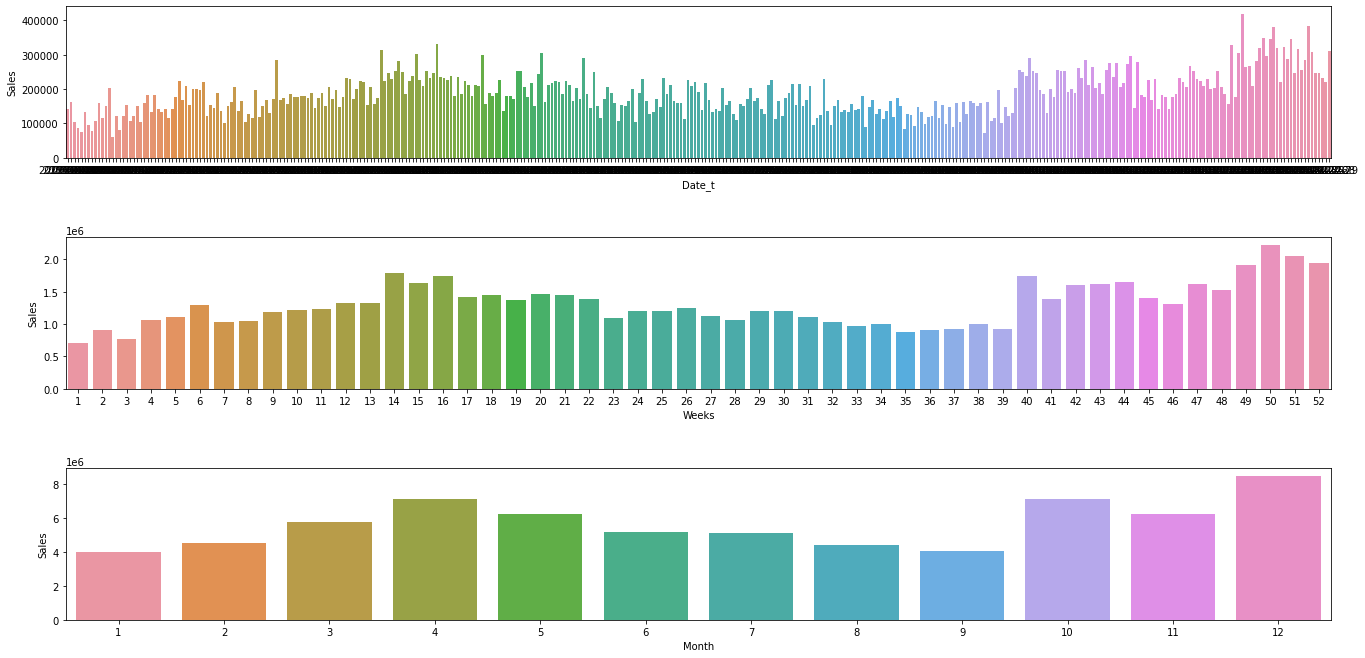

In [ ]:
figure, ax = plt.subplots(nrows=3)
plt.tight_layout()
figure.set_size_inches(20,10)

sns.barplot(x='Date_t', y ='Sales', data=df_d, ax=ax[0])
sns.barplot(x='Weeks', y ='Sales', data=df_w, ax=ax[1])
sns.barplot(x='Month', y ='Sales', data=df_m, ax=ax[2]);

In [ ]:
df_d['Date_t'] = pd.to_datetime(df_d['Date_t'])
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 2019-01-01 to 2019-12-29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Sales   363 non-null    float64       
 1   Date    363 non-null    float64       
 2   Date_t  363 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 19.4+ KB


In [ ]:
df_d = df_d.set_index('Date_t')

In [ ]:
df_phone.head()

,Order_ID,Product,Quantity,Price,Order_Date,Gender,Age_Range,Discount,Date,Weeks,Month,Sales,Customer_city
0,141732,iPhone,20,700.0,2019-01-01 06:13:00,1,20,0.01,2019-01-01,1,1,13860.0,Atlanta
1,144804,iPhone,4,700.0,2019-01-01 07:29:00,1,20,0.19,2019-01-01,1,1,2268.0,New York City
2,145270,Google Phone,25,600.0,2019-01-01 07:33:00,0,10,0.18,2019-01-01,1,1,12300.0,Dallas
3,142134,Google Phone,3,600.0,2019-01-01 09:23:00,1,10,0.11,2019-01-01,1,1,1602.0,New York City
4,149926,iPhone,10,700.0,2019-01-01 09:33:00,1,40,0.02,2019-01-01,1,1,6860.0,Atlanta


In [ ]:
df_phone.columns

Index(['Order_ID', 'Product', 'Quantity', 'Price', 'Order_Date', 'Gender',
       'Age_Range', 'Discount', 'Date', 'Weeks', 'Month', 'Sales',
       'Customer_city'],
      dtype='object')

> 시계열 데이터 기반으로 예측하기위해 TimeSeriesSplit 교차검증을 시행

In [ ]:
# 시계열 데이터 활용을 위해 전날매출, 매출차 컬럼 생성
# 컬럼값이 없는 초기 2일치 데이터는 삭제

df_day = df_d.loc[:,['Sales']]

df_day['Yesterday'] = df_day.loc[:,['Sales']].shift()
df_day.loc[:,'Yesterday'] = df_day.loc[:,['Sales']].shift()
df_day.loc[:,'Yesterday_Diff'] = df_day.loc[:,['Yesterday']].diff()

df_day = df_day.dropna()

df_day.head()

,Sales,Yesterday,Yesterday_Diff
Date_t,,,
2019-01-03,104360.0,163029.0,20862.0
2019-01-04,85766.0,104360.0,-58669.0
2019-01-05,74831.0,85766.0,-18594.0
2019-01-06,134135.0,74831.0,-10935.0
2019-01-07,96539.0,134135.0,59304.0


In [ ]:
# 데이터 분할 : Train, Validation, Test

target = 'Sales'

X_d_train = df_day[:'2019-11-30'].drop(target, axis=1)
y_d_train = df_day.loc[:'2019-11-30', target]

X_d_test = df_day['2019-12'].drop(target, axis=1)
y_d_test = df_day.loc['2019-12', target]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


In [ ]:
X_d_test.to_csv('X_d_test.csv')
y_d_test.to_csv('y_d_test.csv')

LR: -0.353897 (0.243711)
RF: -0.798506 (0.509493)
SVR: -1.147008 (0.964847)
[04:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:42:29] WARNING: /workspace/src/

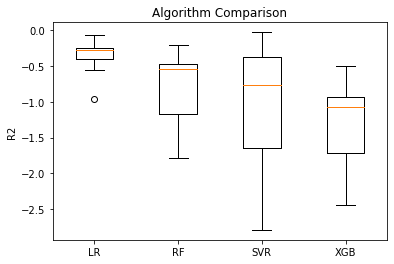

In [ ]:
# 선형회귀, 랜덤포레스트, SVR로 교차검증 진행

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit 
from matplotlib.patches import Patch

models = []
models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestRegressor(n_estimators = 10))) 
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
models.append(('XGB', XGBRegressor(n_estimators=1000, learning_rate=0.2, n_jobs=-1)))
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=10)
    
    cv_results = cross_val_score(model, X_d_train, y_d_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('R2')
plt.show()

In [ ]:
# performance metrics

import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))             
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_d_train, y_d_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

# checking the best model performance on test data 

y_true = y_d_test.values
y_pred = best_model.predict(X_d_test)
regression_results(y_true, y_pred)

explained_variance:  -0.2478
mean_squared_log_error:  0.148
r2:  -2.3863
MAE:  84705.2019
MSE:  10394947345.6663
RMSE:  101955.6146


> 모든 모델에서 R2 값이 마이너스로 나오는 예측이 어려운 상황임. <br>
> RandomForest 최적 하이퍼파라미터를 찾아서 적용 했음에도 R2값은 마이너스로 더 커지고 MAE 도 높은 수준임

In [ ]:
df_d.tail()

,Sales,Date,Date_t
Date,,,
2019-12-25,246243.0,20191225.0,2019-12-25
2019-12-26,246755.0,20191226.0,2019-12-26
2019-12-27,233086.0,20191227.0,2019-12-27
2019-12-28,221391.0,20191228.0,2019-12-28
2019-12-29,309743.0,20191229.0,2019-12-29


> 시계열 예측을 위해 다른 방법을 찾는 중 Prophet 라이브러리를 발견

In [ ]:
# 시계열 예측을 위해 Prophet 라이브러리를 사용

from fbprophet import Prophet

prophet_df = df_d[['Date_t', 'Sales']] 
prophet_df = prophet_df.rename(columns={'Date_t':'ds', 'Sales':'y'})
prophet_df

,ds,y
Date,,
2019-01-01,2019-01-01,142167.0
2019-01-02,2019-01-02,163029.0
2019-01-03,2019-01-03,104360.0
2019-01-04,2019-01-04,85766.0
2019-01-05,2019-01-05,74831.0
...,...,...
2019-12-25,2019-12-25,246243.0
2019-12-26,2019-12-26,246755.0
2019-12-27,2019-12-27,233086.0


In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2020-01-24,313657.894973,258032.457960,368907.227903,310273.488291,316541.218606,3309.365964,3309.365964,3309.365964,3309.365964,3309.365964,3309.365964,0.0,0.0,0.0,316967.260938
389,2020-01-25,314809.091918,259863.872449,371096.600205,311234.061334,317851.561053,587.309393,587.309393,587.309393,587.309393,587.309393,587.309393,0.0,0.0,0.0,315396.401312
390,2020-01-26,315960.288863,262237.327336,371015.915895,312191.962356,319191.047681,1964.986196,1964.986196,1964.986196,1964.986196,1964.986196,1964.986196,0.0,0.0,0.0,317925.275059
391,2020-01-27,317111.485808,259863.711343,367821.197794,313154.473745,320560.110409,-2109.186272,-2109.186272,-2109.186272,-2109.186272,-2109.186272,-2109.186272,0.0,0.0,0.0,315002.299536
392,2020-01-28,318262.682753,263840.396673,378371.971695,314172.090762,321919.066148,3377.986908,3377.986908,3377.986908,3377.986908,3377.986908,3377.986908,0.0,0.0,0.0,321640.669661


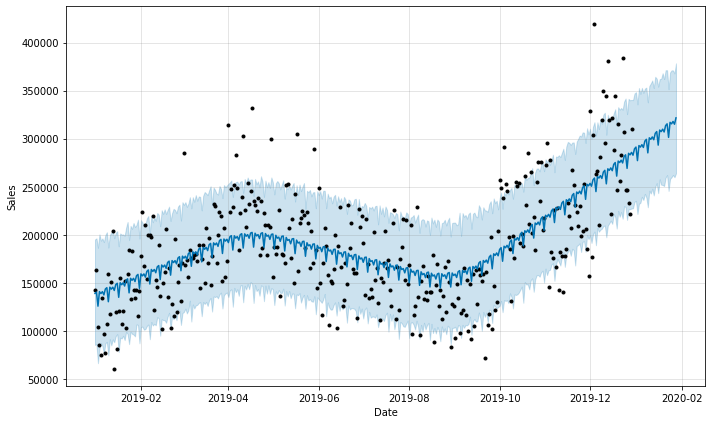

In [ ]:
fig1 = m.plot(forecast, xlabel='Date', ylabel='Sales')
plt.show()


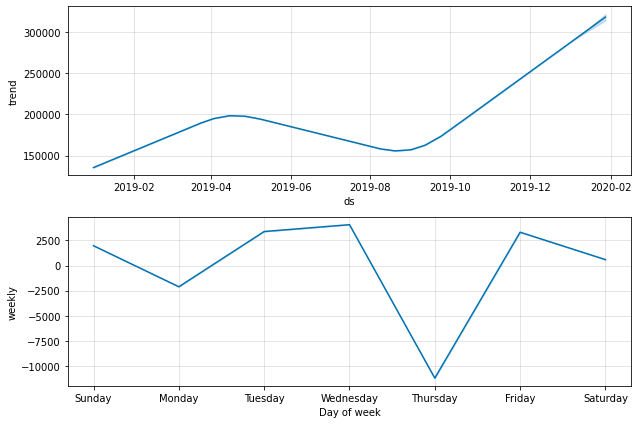

In [ ]:
fig2 = m.plot_components(forecast)
plt.show()


In [ ]:
dec_sales = df_m.iloc[-1]['Sales']
jan_sales = forecast.iloc[-28:]['yhat'].sum()
jan_sales_min = forecast.iloc[-28:]['yhat_lower'].sum()
jan_sales_max = forecast.iloc[-28:]['yhat_upper'].sum()
growth_ratio = 1-((jan_sales - dec_sales)/dec_sales)
mkt = jan_sales * 0.02

print(f'Forecast Growth Ratio : {round(growth_ratio,2)*100}%')
print(f'Forecast Sales of Dec2019 : ${round(dec_sales,2)}')
print(f'Forecast Sales of Jan2020 : ${round(jan_sales,2)}')
print(f'Minimum Sales : ${round(jan_sales_min,2)}')
print(f'Maximum Sales : ${round(jan_sales_max,2)}')
print(f'Marketting Budget : ${round(mkt,2)}')

Forecast Growth Ratio : 100.0%
Forecast Sales of Dec2019 : $8485259.0
Forecast Sales of Jan2020 : $8476202.67
Minimum Sales : $6915426.56
Maximum Sales : $10038633.08
Marketting Budget : $169524.05


In [ ]:
!pip install fbprophet

In [ ]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Out-Of-Sample Forecast, 성능확인 위해 기존 데이터 내에서 평가
# 2019년 1~3분기 데이터로 4분기 데이터를 예측했을때의 검증값(MAE) 확인

p_train = prophet_df['2019-01-01':]
p_train = p_train[:'2019-11-30']

p_test = prophet_df.loc['2019-12-01':]
p_test = p_test.loc[:'2019-12-31']
p_true = prophet_df.loc['2019-12-01':]
p_true = p_true.loc[:'2019-12-31']['y']
                      
m = Prophet()
m.fit(p_train)

forecast = m.predict(p_test)
y_pred = forecast['yhat'].values

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(p_true, y_pred)

print(f'MAE : {mae}')


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE : 71696.53405580384


> 1Q MAE : 38983.50 <br>
> 2Q MAE : 35827.19 <br> 
> 3Q MAE : 106636.03 <br>
> 4Q MAE : 55308.80 <br>
    
> Annually MAE : 71696.53

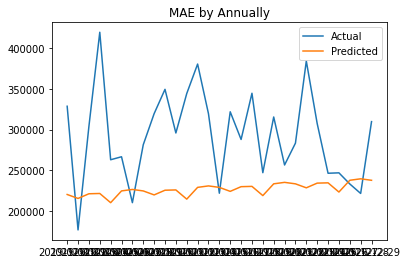

In [ ]:
plt.plot(p_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('MAE by Annually')
plt.legend()
plt.show()